# Classificação - Flowers

### Daniel Gleison Moreira Lira - PPGCC - UECE


**IMPORTANDO BIBLIOTECAS**

In [960]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate

**VERIFICANDO O RECONHECIMENTO DA GPU PARA PROCESSAMENTO DAS IMAGENS**

In [871]:
print("Num GPUs Available: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


**REALIZANDO DOWNLOAD DO DATASET**

In [12]:
!curl -o dataset.tgz http://download.tensorflow.org/example_images/flower_photos.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  28.5M      0  0:00:07  0:00:07 --:--:-- 32.4M


**DESCOMPACTANDO O DATASET**

In [ ]:
!tar zxvf dataset.tgz -C dataset

**VERIFICANDO O BALANCEAMENTO DAS CLASSES**

In [872]:
pathCount = 0

for i in range(len(dirClasses)): 
    dirCount = len(os.listdir(pathImages + dirClasses[i]))
    pathCount = pathCount + dirCount
    print(str(dirClasses[i]) + ': ' + str(dirCount))
    
print('\n' + 'total: ' + str(pathCount))

daisy: 633
dandelion: 898
roses: 641
sunflowers: 699
tulips: 799

total: 3670


**EXIBINDO IMAGENS DO DATASET ORIGINAL**

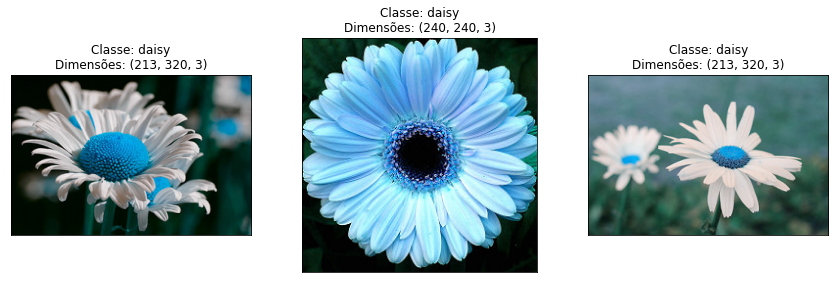

In [873]:
def loadOriginalImages(pathImages,numImages,idClasse):

    fig = plt.figure(figsize=(25, 25))

    dirImages  = pathImages + dirClasses[idClasse] + "/"
    for i in range(numImages):
        fig.add_subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        listImages = os.listdir(dirImages)
        img = cv2.imread(dirImages + listImages[i])
        plt.imshow(img)
        plt.title('Classe: '+dirClasses[idClasse]+'\n'+'Dimensões: '+str(np.array(img).shape))
    plt.savefig(dirClasses[idClasse], dpi=72, bbox_inches='tight')

loadOriginalImages(pathImages,3,0)

**PROCESSANDO IMAGENS**

In [874]:
%%time

pathImages = "dataset/flower_photos/" #caminho do dataset
dirClasses = ['daisy','dandelion','roses','sunflowers','tulips'] # nome das classes

def ProcessImages(): # FUNÇÃO DE PROCESSAMENTO DAS IMAGENS  
   
    list_images = []
    images = []
    labels = []
    sizeImg = 25 # define o novo tamanho das imagens (25x25 pixels)
       
    for i in range(len(dirClasses)):     
        dirImages  = pathImages + dirClasses[i] + "/" # define o caminho dos diretórios das classes
        listImages = os.listdir(dirImages) #lista as imagens de cada diretório       
        for x in range(len(listImages)): # faz a varredura em todos os arquivos dos diretórios           
            img = cv2.imread(dirImages + listImages[x]) #lê os arquivos de imagem do dataset
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte para escala de cinza
            img_res = cv2.resize(img_gray,(sizeImg,sizeImg)) # redimensiona para o tamanho 25x25 pixles
            cv2.imwrite('resized/' +str(i)+'/image' + str(x)+ '.png',img_res) #salva as imagens no novo formato
            img_nor = img_res.astype('float32')/255 # normaliza os elementos da matriz
            img_vec = np.array(img_nor).flatten() # transforma a matriz em vetor
            images.append(img_vec) # adiciona no array de atributos das imagens
            labels.append(dirClasses[i]) # adiciona no array das classes
    return images, labels # saídas da função

# executa o processamento de cada imagem e salva as saídas da função nas variáveis imagens e labels
images, labels = ProcessImages()

# salva as saídas da função em formato numpy
np.save('images.npy', images)
np.save('labels.npy', labels)

# salva as saídas da função em formato CSV
np.savetxt('images.csv', images, delimiter=',')
np.savetxt('labels.csv', images, delimiter=',')

CPU times: user 44.1 s, sys: 38.8 s, total: 1min 22s
Wall time: 19.4 s


In [723]:
images[0][0:100]

array([0.01176471, 0.01176471, 0.01176471, 0.01176471, 0.01568628,
       0.01568628, 0.01960784, 0.01568628, 0.01568628, 0.01568628,
       0.01568628, 0.01960784, 0.01960784, 0.02745098, 0.08235294,
       0.03529412, 0.01568628, 0.1254902 , 0.22745098, 0.12156863,
       0.15294118, 0.42745098, 0.5921569 , 0.45490196, 0.34901962,
       0.01568628, 0.01568628, 0.01568628, 0.01568628, 0.1254902 ,
       0.6745098 , 0.5372549 , 0.01568628, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.6       , 0.07843138, 0.11372549,
       0.01960784, 0.01568628, 0.14117648, 0.19215687, 0.10980392,
       0.16470589, 0.48235294, 0.69803923, 0.5803922 , 0.43529412,
       0.01568628, 0.01568628, 0.01568628, 0.01960784, 0.5137255 ,
       0.05882353, 0.7921569 , 0.39215687, 0.2       , 0.01960784,
       0.34509805, 0.2627451 , 0.58431375, 0.10980392, 0.1254902 ,
       0.01960784, 0.01960784, 0.14117648, 0.15686275, 0.08627451,
       0.18431373, 0.62352943, 0.72156864, 0.57254905, 0.40784

**TRANSFORMANDO OS ARRAYS DE IMAGENS E CLASSES EM DATAFRAME PANDAS**

In [724]:
data = imagens, labels
column_names = ['pixels','classe']
dfImages = pd.DataFrame(data, column_names)
dfImages = dfImages.T
dfImages['pixels'][0]

array([0.01176471, 0.01176471, 0.01176471, 0.01176471, 0.01568628,
       0.01568628, 0.01960784, 0.01568628, 0.01568628, 0.01568628,
       0.01568628, 0.01960784, 0.01960784, 0.02745098, 0.08235294,
       0.03529412, 0.01568628, 0.1254902 , 0.22745098, 0.12156863,
       0.15294118, 0.42745098, 0.5921569 , 0.45490196, 0.34901962,
       0.01568628, 0.01568628, 0.01568628, 0.01568628, 0.1254902 ,
       0.6745098 , 0.5372549 , 0.01568628, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.6       , 0.07843138, 0.11372549,
       0.01960784, 0.01568628, 0.14117648, 0.19215687, 0.10980392,
       0.16470589, 0.48235294, 0.69803923, 0.5803922 , 0.43529412,
       0.01568628, 0.01568628, 0.01568628, 0.01960784, 0.5137255 ,
       0.05882353, 0.7921569 , 0.39215687, 0.2       , 0.01960784,
       0.34509805, 0.2627451 , 0.58431375, 0.10980392, 0.1254902 ,
       0.01960784, 0.01960784, 0.14117648, 0.15686275, 0.08627451,
       0.18431373, 0.62352943, 0.72156864, 0.57254905, 0.40784

dtype('float32')

In [555]:
dfImages['classe'].value_counts()

dandelion     898
tulips        799
sunflowers    699
roses         641
daisy         633
Name: classe, dtype: int64

In [561]:
dfImages['classe'].value_counts().describe()

count      5.000000
mean     734.000000
std      113.132665
min      633.000000
25%      641.000000
50%      699.000000
75%      799.000000
max      898.000000
Name: classe, dtype: float64

In [518]:
x = list(df.index)
y = [633,898,641,699,799]]
x,y

([0, 1, 2, 3, 4],
 1    898
 4    799
 3    699
 2    641
 0    633
 Name: classe, dtype: int64)

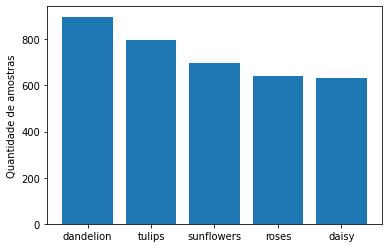

In [553]:
x = dfImages['classe'].value_counts().index
y = dfImages['classe'].value_counts()

plt.ylabel('Quantidade de amostras')
plt.bar(x, y)
plt.savefig('distribuicao_clasess.png')
plt.show()


**SALVANDO AS IMAGENS E CLASSES EM  NUMPY**

In [272]:

#a = np.load('imagens.npy')

**VISUALIZANDO O ARRAY DE IMAGENS**

In [710]:
dfImagens = pd.DataFrame(images)
print(dfImagens.shape)
dfImagens[0]

(3670, 625)


0       0.011765
1       0.203922
2       0.552941
3       0.635294
4       0.227451
          ...   
3665    0.164706
3666    0.090196
3667    0.874510
3668    0.047059
3669    0.333333
Name: 0, Length: 3670, dtype: float64

**VISUALIZANDO O ARRAY DE LABELS**

In [199]:
dfLabels = pd.DataFrame(labels)
print(dfLabels.shape)
dfLabels

(3670, 1)


,0
0,0
1,0
2,0
3,0
4,0
...,...
3665,4
3666,4
3667,4
3668,4


**EXIBINDO IMAGENS PROCESSADAS**

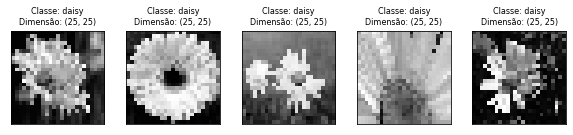

In [701]:
def loadProcessImages(pathImages,numImages):
    
    plt.figure(figsize=(10,10))
    
    for i in range(numImages):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = imagens[i].reshape(size, size)     
        plt.imshow(img, cmap='gray') #cmap=plt.cm.binary
        plt.title('Classe: ' + dirClasses[idClasse] + '\n' + 'Dimensão: ' + str(np.array(img).shape), fontsize =8)
    plt.savefig('resized'+str(idClasse)+'.png', dpi=72, bbox_inches='tight')
    
loadProcessImages(pathImages,5)

**IMAGENS DO DATASET X IMAGENS PROCESSADAS**

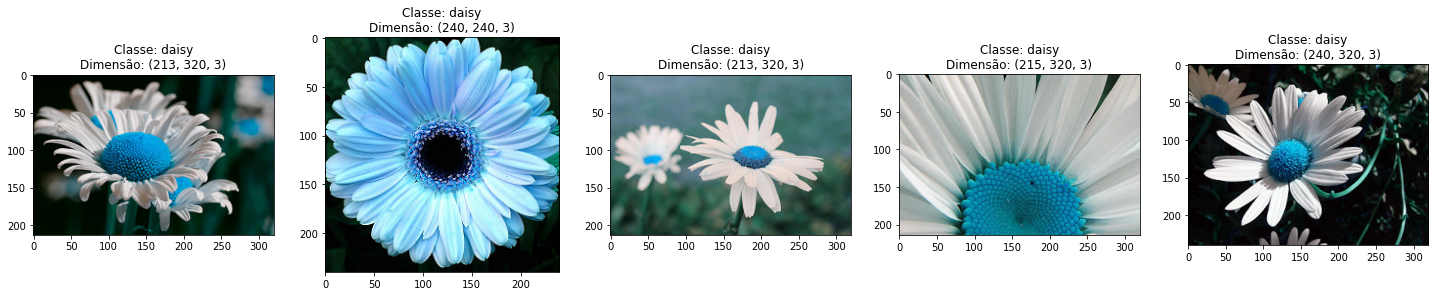

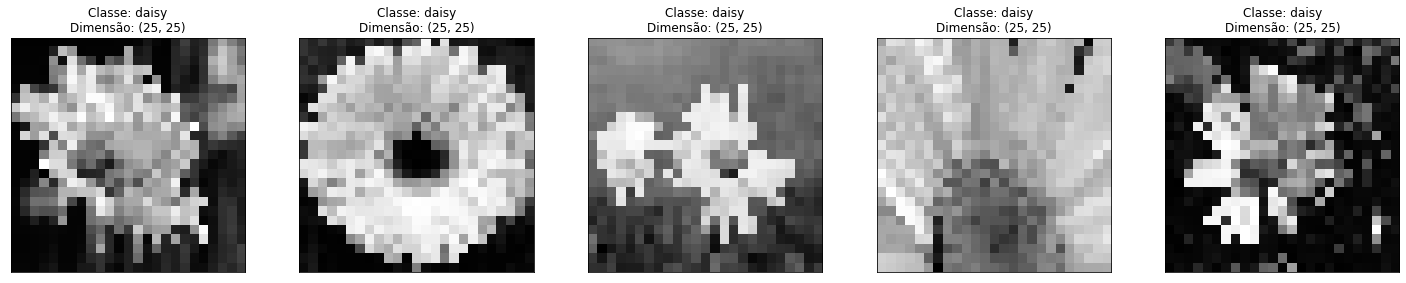

In [210]:
loadOriginalImages(pathImages,5,0)
loadProcessImages(pathImages,5,0)

# Tarefas - Classificação

### 1. Centralizar a matriz de dados original $\tilde{X}$ obtendo a matriz $X$.
---

In [955]:
# X centralizado = X original - X médio
X_ori = images
X_med= np.mean(X_ori, axis=0)
X_cen = X_ori - X_med
X_cen[0][0:5]

array([-0.3811685 , -0.38732836, -0.39720443, -0.40530807, -0.41007605],
      dtype=float32)

In [1035]:
a = [X_cen[0][0:5]]
print (tabulate(a, tablefmt="latex", ))

\begin{tabular}{rrrrr}
\hline
 -0.381169 & -0.387328 & -0.397204 & -0.405308 & -0.410076 \\
\hline
\end{tabular}


### 2. Dividir o banco de dados em conjunto de treinamento e conjunto de teste
---

In [942]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = \
    train_test_split (X_ori, labels, test_size=0.3, random_state = 0)
X_train_ori[0][0:5]

array([0.3137255 , 0.24313726, 0.3529412 , 0.41568628, 0.44313726],
      dtype=float32)

In [943]:
X_train_cen, X_test_cen, y_train_cen, y_test_cen = \
    train_test_split (X_cen, labels, test_size=0.3, random_state = 0)
X_train_cen[0][0:5]

array([-0.07920772, -0.1559558 , -0.05602795, -0.00138649,  0.01737493],
      dtype=float32)

In [945]:
print (tabulate([X_train_cen[0][0:5]], tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
 -0.0792077 & -0.155956 & -0.0560279 & -0.00138649 & 0.0173749 \\
\hline
\end{tabular}


In [750]:
np.array(X_train_cen).shape

(2569, 625)

In [752]:
X_train_cen

array([[-0.07920772, -0.1559558 , -0.05602795, ..., -0.2552128 ,
        -0.03034177, -0.12106048],
       [-0.1184234 , -0.14026952,  0.08907008, ...,  0.07027739,
        -0.18720452,  0.13384148],
       [-0.02038419,  0.00482851, -0.26779264, ...,  0.4585127 ,
         0.28338373,  0.23188072],
       ...,
       [ 0.39138052,  0.0440442 ,  0.26161912, ...,  0.41537544,
         0.44024646,  0.5965866 ],
       [ 0.34824327,  0.17345598,  0.3008348 , ...,  0.05459112,
         0.20887393, -0.23478597],
       [-0.03999203, -0.04223031, -0.05210638, ...,  0.0075323 ,
         0.18142295,  0.20835131]], dtype=float32)

### 3. Calcular a matriz de covariância dos dados treinamento de duas maneiras:
---

$ np.cov(\tilde{X}) $

In [988]:
cov_1 = np.cov(X_train_ori,rowvar=False)
print(cov_1.shape)
print(cov_1[0][0:5])
print ('\n', tabulate([cov_1[0][0:5]], tablefmt="latex"))

(625, 625)
[0.08676848 0.07786411 0.07411337 0.07149644 0.06801185]

 \begin{tabular}{rrrrr}
\hline
 0.0867685 & 0.0778641 & 0.0741134 & 0.0714964 & 0.0680118 \\
\hline
\end{tabular}


$ 1/(m-1)X^TX $

In [992]:
m = X_train_cen.shape[0] #linhas de X
cov_2 = np.dot(X_train_cen.T,X_train_cen) /(m-1)
print(cov_2.shape)
print(cov_2[0][0:5])
print ('\n', tabulate([cov_2[0][0:5]], tablefmt="latex"))

(625, 625)
[0.08690294 0.0780028  0.07427091 0.07165231 0.06814168]

 \begin{tabular}{rrrrr}
\hline
 0.0869029 & 0.0780028 & 0.0742709 & 0.0716523 & 0.0681417 \\
\hline
\end{tabular}


In [1044]:
erro = np.max(cov_2 - cov_1)
erro

0.00018451831618951364

### 4. Calcular a decomposição espectral da matriz de covariância dos dados de treinamento, isto é, $cov(X) = Q\Lambda Q^T$
---

In [1061]:
A = cov_train_cen
w, Q = np.linalg.eigh(A) #w = autovalores, Q = autovetores
index = np.argsort(w)[::-1] #Obter índices para ordenação decrescente dos autovalores
w_dec = w[index]
Q_dec = Q[index]
print('Autovalores decrescentes: \n',w_dec[0:5])
print('Autovetores decrescentes: \n',Q_dec[0][0:5])
print ('Autovalores decrescentes: \n', tabulate([w_dec[0:5]], tablefmt="latex"))
print ('Autovetores decrescentes: \n', tabulate([Q_dec[0][0:5]], tablefmt="latex"))

Autovalores decrescentes: 
 [12.030397    3.288652    2.5631742   1.5113423   0.95622945]
Autovetores decrescentes: 
 [-0.01884214  0.00144189 -0.0216398   0.01409678 -0.02726185]
Autovalores decrescentes: 
 \begin{tabular}{rrrrr}
\hline
 12.0304 & 3.28865 & 2.56317 & 1.51134 & 0.956229 \\
\hline
\end{tabular}
Autovetores decrescentes: 
 \begin{tabular}{rrrrr}
\hline
 -0.0188421 & 0.00144189 & -0.0216398 & 0.0140968 & -0.0272619 \\
\hline
\end{tabular}


# Questões - Classificação

### 2. Verificar, com o respectivo banco de dados, que: $Q^TQ \approx  I.$
---

In [1067]:
Q_dec_T = Q_dec.T
Q_ide = np.dot(Q_dec,Q_dec_T)
I = np.identity(Q_ide.shape[0])
erro = np.max(Q_dec_T - I)
erro

0.3115290105342865

### 5. Calcular, com o respectivo banco de dados, as matrizes $\hat{Z}$ e $\hat{X}$; verificar que a matriz de projeção $$\hat{Q}\hat{Q}^T$$ não é a matriz identidade.
---

In [1076]:
#projeção da base de autovetores com r primeiras colunas
r = 50
Q_proj = Q_dec[:,0:r]
Z_proj = np.dot(X_train_cen, Q_proj) # Z^ = XQ^
print(Z_proj.shape)
print(Z_proj[0:3,0:3])
print ('\n', tabulate([Z_proj[0:3,0:3]], tablefmt="latex"))

(2569, 50)
[[ 0.00526396  0.04331234  0.05107567]
 [-0.11540616 -0.03422908  0.01853382]
 [-0.0230696  -0.02548697  0.07876009]]

 \begin{tabular}{lll}
\hline
 [0.00526396 0.04331234 0.05107567] & [-0.11540616 -0.03422908  0.01853382] & [-0.0230696  -0.02548697  0.07876009] \\
\hline
\end{tabular}


In [1078]:
#X^= XQ^Q^T
X_proj = np.dot(X_train_cen, Q_proj )
X_proj = np.dot(X_proj,Q_proj.T)
print(X_proj.shape)
print(X_proj[0:3,0:3])
print ('\n', tabulate([X_proj[0:3,0:3]], tablefmt="latex"))

(2569, 625)
[[-0.00035869 -0.01514007 -0.00946952]
 [-0.04923128 -0.00452268  0.06994967]
 [ 0.05239061 -0.00643919 -0.01619906]]

 \begin{tabular}{lll}
\hline
 [-0.00035869 -0.01514007 -0.00946952] & [-0.04923128 -0.00452268  0.06994967] & [ 0.05239061 -0.00643919 -0.01619906] \\
\hline
\end{tabular}


In [1080]:
#verificando se Q^QT não é matriz identidade
a = np.dot(Q_proj, Q_proj.T)
I = np.identity(Q_ide.shape[0])         
erro = np.max(a-I)
erro

0.08999961614608765